In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df = pd.read_csv('canada_per_capita_income.csv')
df.shape

(47, 2)

In [4]:
df


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


<Axes: xlabel='year', ylabel='per capita income (US$)'>

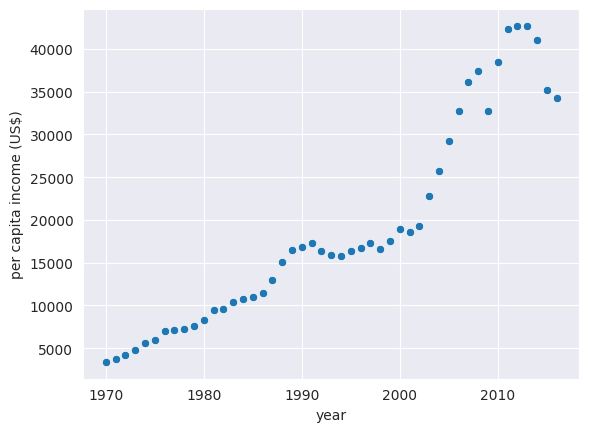

In [5]:
sns.scatterplot(x=df['year'], y=df['per capita income (US$)'])


In [6]:
X= df['year']
y= df['per capita income (US$)']
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2)
reshaped_X_train = np.array(X_train).reshape(-1,1)
X_test= np.array(X_test).reshape(-1,1)

In [7]:
X_train

3     1973
19    1989
10    1980
34    2004
17    1987
7     1977
20    1990
11    1981
2     1972
14    1984
8     1978
12    1982
45    2015
44    2014
16    1986
33    2003
35    2005
32    2002
25    1995
42    2012
40    2010
41    2011
0     1970
13    1983
39    2009
36    2006
31    2001
46    2016
15    1985
28    1998
29    1999
4     1974
5     1975
21    1991
22    1992
38    2008
1     1971
Name: year, dtype: int64

In [40]:
lin_model = LinearRegression()
lin_model.fit(reshaped_X_train,y_train)
preds=lin_model.predict(X_test)
print("Model parameters:", lin_model.get_params())
preds

Model parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


array([19098.60920039, 21544.24367445, 24805.08963985, 30511.57007931,
        7685.64832148,  5240.01384742, 19913.82069174, 15022.55174364,
       22359.4551658 , 35402.83902742])

In [25]:
mse = mean_squared_error(y_test,preds)
mse
rmse = np.sqrt(mse)
rmse
r2= r2_score(y_test, preds)
r2

0.8303429592178462

In [13]:
year = [[2020]]
    
# year= np.array(['2020'])
pred = lin_model.predict(year)
pred

array([41109.31946687])

<Axes: xlabel='per capita income (US$)'>

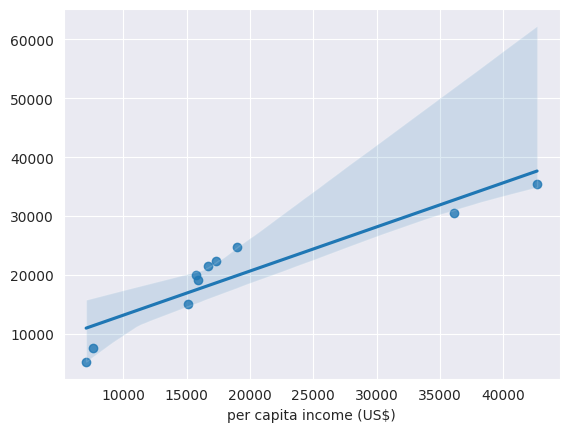

In [31]:
sns.regplot(x=y_test,y=preds)

In [14]:
lin_model.coef_

array([815.21149135])

In [15]:
lin_model.intercept_

-1605617.8930624689

In [17]:
manual_pred = (815.211491 * 2020) + -1605617.8930624689
manual_pred

41109.31875753123

In [38]:
years = X_test.flatten()
final_df =pd.DataFrame({'year' :years,'income':preds})
final_df


,year,income
0,1993,19098.609200
1,1996,21544.243674
2,2000,24805.089640
3,2007,30511.570079
4,1979,7685.648321
5,1976,5240.013847
6,1994,19913.820692
7,1988,15022.551744
8,1997,22359.455166
9,2013,35402.839027


In [39]:
final_df.to_csv('my_prediction',index=False)

# Using Trained Model

In [33]:
import joblib

In [35]:
# Save the model as a pickle file
filename ='./my_trained_model_canada_income.pkl'
joblib.dump(lin_model,filename)

['./my_trained_model_canada_income.pkl']